In [3]:
import tensorflow as tf

cnn = tf.keras.models.load_model('cifar10_accuracy_82v1.h5')
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [4]:
import cv2
src_img1 = cv2.imread('dog.jpg')
src_img2 = cv2.imread('cat.jpg')
src_img3 = cv2.imread('airplane.jpg')

dst_img1 = cv2.cvtColor(src_img1, cv2.COLOR_BGR2RGB)
dst_img2 = cv2.cvtColor(src_img2, cv2.COLOR_BGR2RGB)
dst_img3 = cv2.cvtColor(src_img3, cv2.COLOR_BGR2RGB)

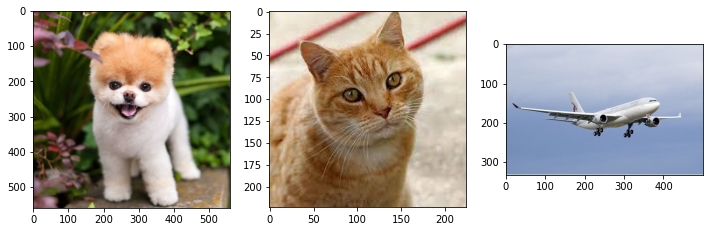

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

plt.subplot(131)
plt.imshow(dst_img1)
plt.subplot(132)
plt.imshow(dst_img2)
plt.subplot(133)
plt.imshow(dst_img3)

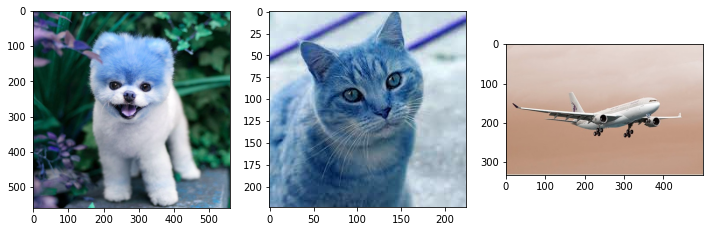

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

plt.subplot(131)
plt.imshow(src_img1)
plt.subplot(132)
plt.imshow(src_img2)
plt.subplot(133)
plt.imshow(src_img3)

In [7]:
resize_img1 = cv2.resize(dst_img1,dsize=(32,32))
resize_img2 = cv2.resize(dst_img2,dsize=(32,32))
resize_img3 = cv2.resize(dst_img3,dsize=(32,32))

resize_img1 = resize_img1 / 255.0
resize_img2 = resize_img2 / 255.0
resize_img3 = resize_img3 / 255.0

In [8]:
import numpy as np
test_data = [resize_img1, resize_img2, resize_img3 ]
test_data = np.array(test_data)

In [9]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [10]:
pred = cnn.predict(test_data)
pred.shape

(3, 10)

In [11]:
for index in range(len(pred)):

    class_index = np.argmax(pred[index])
    print('prediction => ',class_names[class_index], pred[index].max())

prediction =>  dog 0.9174403
prediction =>  dog 0.9508884
prediction =>  airplane 1.0


In [12]:
top3 = 3

for index in range(len(pred)):

    sorted_index = pred[index].argsort()  # 오름차순으로 인덱스 정렬
    sorted_index = sorted_index[::-1]     # 내림차순으로 인덱스 정렬

    print('=====================================')
    print(sorted_index)
    
    for j in range(top3):
        pred_val = pred[index, sorted_index[j]]
        class_index = sorted_index[j]
        print('prediction => ',class_names[class_index], pred_val)
        

[5 4 3 7 2 6 0 9 1 8]
prediction =>  dog 0.9174403
prediction =>  deer 0.039465614
prediction =>  cat 0.020931294
[5 3 6 7 4 2 8 9 1 0]
prediction =>  dog 0.9508884
prediction =>  cat 0.035632446
prediction =>  frog 0.009060885
[0 2 8 4 3 9 6 5 7 1]
prediction =>  airplane 1.0
prediction =>  bird 2.4126496e-08
prediction =>  ship 3.5874345e-11
